<a href="https://colab.research.google.com/github/codestuff001/notebooks/blob/main/CodeFormer_inference-220810.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <img src="https://user-images.githubusercontent.com/14334509/179359809-bd45566a-486d-418f-83fa-67bbbba8c45c.png" height=120>
</p>

# CodeFormer Inference Demo 
## Towards Robust Blind Face Restoration with Codebook Lookup Transformer
Shangchen Zhou, Kelvin C.K. Chan, Chongyi Li, Chen Change Loy

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2206.11253)
[![GitHub Stars](https://img.shields.io/github/stars/sczhou/CodeFormer?style=social)](https://github.com/sczhou/CodeFormer)
![visitors](https://visitor-badge.glitch.me/badge?page_id=sczhou/CodeFormer)

# 1. Preparations
Before start, make sure that you choose
* Hardware Accelerator = GPU (in the Runtime menu -> Change runtime type)

Then, we clone the repository, set up the envrironment, and download the pre-trained model.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Clone CodeFormer and enter the CodeFormer folder
%cd /content
!rm -rf CodeFormer
!git clone https://github.com/sczhou/CodeFormer.git
%cd CodeFormer

# Set up the environment
# Install python dependencies
!pip install -r requirements.txt
# Install basicsr
!python basicsr/setup.py develop

# Download the pre-trained model
!python scripts/download_pretrained_models.py facelib
!python scripts/download_pretrained_models.py CodeFormer

/content
Cloning into 'CodeFormer'...
remote: Enumerating objects: 237, done.
remote: Counting objects: 100% (237/237), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 237 (delta 59), reused 208 (delta 35), pack-reused 0
Receiving objects: 100% (237/237), 11.88 MiB | 20.41 MiB/s, done.
Resolving deltas: 100% (59/59), done.
/content/CodeFormer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.9 MB 15.0 MB/s 
     |████████████████████████████████| 190 kB 74.4 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
running develop
running egg_info
creating basicsr.egg-info
writing basicsr.egg-info/PKG-INFO
writing dependency_links to basicsr.egg-info/dependency_links.txt
writing requirements to basicsr.egg-info/requires.txt
writing top-level names to basicsr.egg-info/top_level.txt
writing manifest file 'basicsr.egg-info/SOURCES.txt'
writing manifest file 'basicsr.egg-in

# 2. Process your images 🙂

In [11]:
# Upload your own images
import os
from google.colab import files
import shutil

upload_folder = 'inputs/user_upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving A_15th_century_medieval_renaissance_oil_painting_of_Jerma985_portrait_of_Jerma985_grainy_realistic_very_realistic_hyperrealistic_highly_detailed_ve_-n_6_-i_-S_2252867354_ts-1659982232_idx-3.png to A_15th_century_medieval_renaissance_oil_painting_of_Jerma985_portrait_of_Jerma985_grainy_realistic_very_realistic_hyperrealistic_highly_detailed_ve_-n_6_-i_-S_2252867354_ts-1659982232_idx-3.png
move A_15th_century_medieval_renaissance_oil_painting_of_Jerma985_portrait_of_Jerma985_grainy_realistic_very_realistic_hyperrealistic_highly_detailed_ve_-n_6_-i_-S_2252867354_ts-1659982232_idx-3.png to inputs/user_upload/A_15th_century_medieval_renaissance_oil_painting_of_Jerma985_portrait_of_Jerma985_grainy_realistic_very_realistic_hyperrealistic_highly_detailed_ve_-n_6_-i_-S_2252867354_ts-1659982232_idx-3.png


In [21]:
# Inference the uploaded images
# w (0.0 - 1.0), lower value better quality less accurate, higher value better fidelity more accurate, default (0.7)
# you can add '--bg_upsampler realesrgan' to enhance the background
w = 0.7
!python inference_codeformer.py --w $w --test_path inputs/user_upload --bg_upsampler realesrgan

Processing: A_15th_century_medieval_renaissance_oil_painting_of_Jerma985_portrait_of_Jerma985_grainy_realistic_very_realistic_hyperrealistic_highly_detailed_ve_-n_6_-i_-S_2252867354_ts-1659982232_idx-3.png
	detect 1 faces

All results are saved in results/user_upload_0.1


In [22]:
# Visualization function
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Real Input', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('CodeFormer Output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

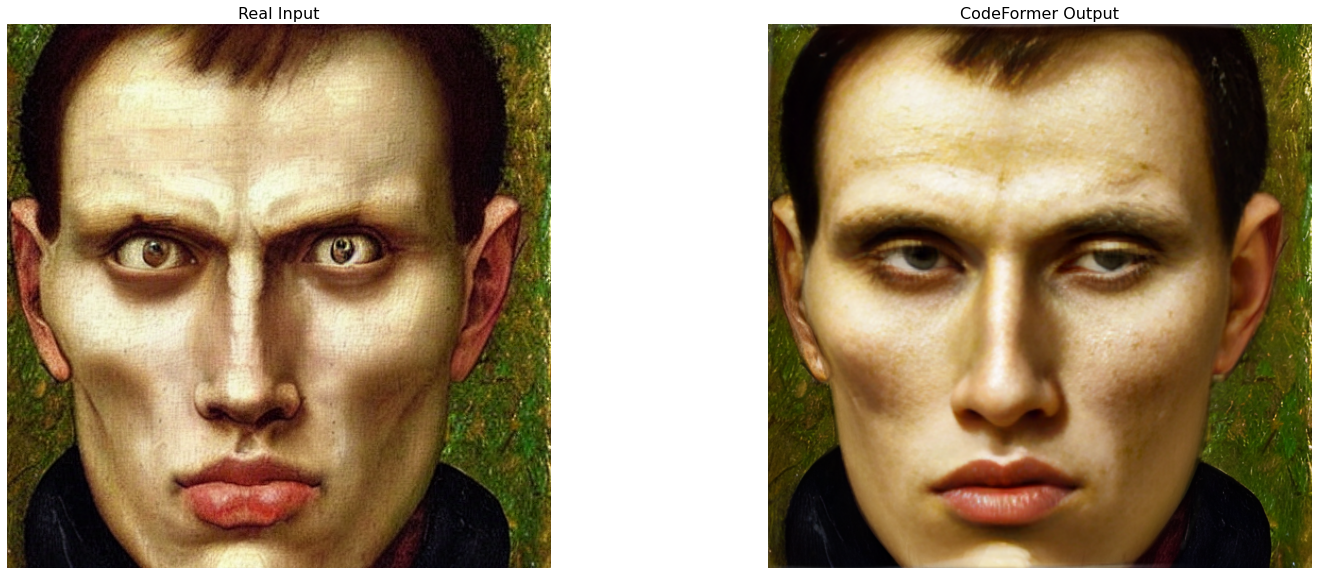

In [23]:
# Visualize the results
import os
import glob

input_folder = 'inputs/user_upload'
result_folder = f'results/user_upload_{w}/final_results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)